In [2]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
import matplotlib.pyplot as plt

# 参数介绍

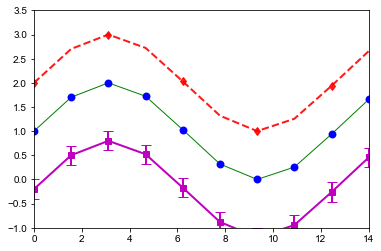

In [28]:
x = np.linspace(0, 14, 10)
y = np.sin(x/2)
plt.figure()
ax=plt.gca()
ax.set_xlim(0,14)
ax.set_ylim(-1, 3.5)
ax.plot(x, y+2, color='r', alpha=0.9, label='line+alpha', lw=2, marker='d', markevery=2, ls='dashed')
ax.plot(x, y+1, color='g', alpha=1, label='line+marker', lw=1, marker='o', markersize=8,
       markerfacecolor='b', mec='w', markeredgewidth=0.1)
ax.errorbar(x, y-0.2, 0.2, marker='s', lw=2, color='m', capsize=5, clip_on=True)

plt.show()

# 案例

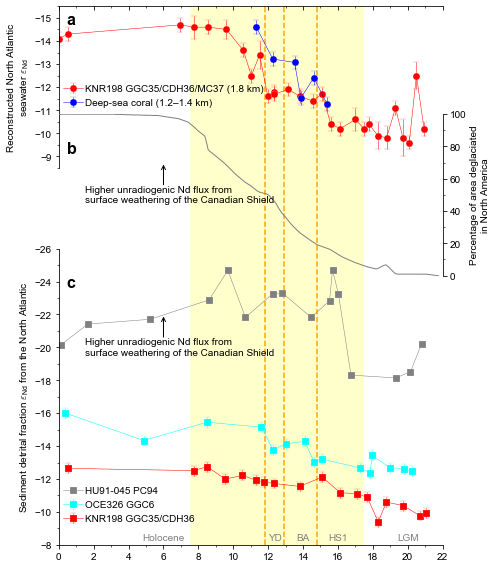

In [104]:
# 1. 
fig=plt.figure(figsize=(7, 8))
ax=plt.gca()
ax.set_xlim(0, 22)
ax.set_ylim(0,1)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_ticks([])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# fig a
axa=ax.inset_axes([0, 0.7, 1, 0.3], transform=ax.transAxes)
axa.set_facecolor('none')
axa.tick_params(axis='x', which='both',direction='in')
axa.xaxis.set_ticks_position('top')
axa.spines['bottom'].set_visible(False)
axa.spines['right'].set_visible(False)
axa.set_xlim(ax.get_xlim())
axa.xaxis.set_major_locator(MultipleLocator(2))
axa.xaxis.set_minor_locator(MultipleLocator(1))
axa.xaxis.set_ticklabels([])
axa.set_ylim(-8.5, -15.5)
axa.yaxis.set_major_locator(MultipleLocator(1))
axa.yaxis.set_minor_locator(MultipleLocator(0.5))
axa.set_ylabel('Reconstructed North Atlantic\nseawater $\\varepsilon_{\mathregular{Nd}}$')
# fig b
axb=ax.inset_axes([0, 0.5, 1, 0.3], transform=ax.transAxes)
axb.set_facecolor('none')
axb.yaxis.set_ticks_position('right')
axb.spines['bottom'].set_visible(False)
axb.spines['top'].set_visible(False)
axb.spines['left'].set_visible(False)
axb.set_xlim(ax.get_xlim())
axb.xaxis.set_ticklabels([])
axb.xaxis.set_ticks([])
axb.set_ylim(0, 100)
axb.yaxis.set_major_locator(MultipleLocator(20))
axb.yaxis.set_minor_locator(MultipleLocator(10))
axb.set_ylabel('Percentage of area deglaciated\nin North America')
axb.yaxis.set_label_position('right')

# fig c
axc=ax.inset_axes([0, 0, 1, 0.55], transform=ax.transAxes)
axc.set_facecolor('none')
axc.tick_params(axis='x',which='both',direction='in')
axc.yaxis.set_ticks_position('left')
axc.spines['bottom'].set_visible(False)
axc.spines['right'].set_visible(False)
axc.spines['top'].set_visible(False)
axc.set_xlim(0,22)
axc.xaxis.set_ticks([])
axc.set_ylim(-8,-26)
axc.yaxis.set_major_locator(MultipleLocator(2))
axc.yaxis.set_minor_locator(MultipleLocator(1))
axc.set_ylabel('Sediment detrital fraction $\\varepsilon_{\mathregular{Nd}}$ from the North Atlantic')

# plot
lw=0.5
ms=7
capsize=3

# fig a
data=pd.read_excel('data/Zhao2019/figure2.xlsx', sheet_name='a1')
axa.errorbar(data['age(ka)'].values, data['y'].values, data['err'].values, color='r', lw=lw, marker='o', mec='w',
            markeredgewidth=0.2, markersize=ms, capsize=capsize, label='KNR198 GGC35/CDH36/MC37 (1.8 km)')
data=pd.read_excel('data/Zhao2019/figure2.xlsx', sheet_name='a2')
axa.errorbar(data['age(ka)'].values, data['y'].values, data['err'].values, color='b', lw=lw, marker='o', mec='w',
            markeredgewidth=0.2, markersize=ms, capsize=capsize, label='Deep-sea coral (1.2–1.4 km)')
axa.legend(frameon=False, borderaxespad=0, handletextpad=0.2, loc='lower left', bbox_to_anchor=(0, 0.35, 1, 1))

# figb
data=pd.read_excel('data/Zhao2019/figure2.xlsx',sheet_name='b')
axb.plot(data['age(ka)'].values, data['y'].values, color='gray', linewidth=lw*2)

# fig c
data=pd.read_excel('data/Zhao2019/figure2.xlsx',sheet_name='c1')
axc.plot(data['age(ka)'].values, data['y'].values, color='gray', lw=lw, marker='s', mec='w',
            markeredgewidth=0.2, markersize=ms, label='HU91-045 PC94')
data=pd.read_excel('data/Zhao2019/figure2.xlsx', sheet_name='c2')
axc.errorbar(data['age(ka)'].values, data['y'].values, data['err'].values, color='cyan', lw=lw, marker='s', mec='w',
            markeredgewidth=0.2, markersize=ms, capsize=capsize,label='OCE326 GGC6')

data=pd.read_excel('data/Zhao2019/figure2.xlsx', sheet_name='c3')
axc.errorbar(data['age(ka)'].values, data['y'].values, data['err'].values, color='r', lw=lw, marker='s', mec='w',
            markeredgewidth=0.2, markersize=ms, capsize=capsize,label='KNR198 GGC35/CDH36')
axc.legend(frameon=False, borderaxespad=0, handletextpad=0.2, loc='lower left', bbox_to_anchor=(0, 0.06, 1, 1))
# 
ax.text(0.02, 0.99, 'a', ha='left',va='top', fontsize=16, fontweight='bold', transform=ax.transAxes)
ax.text(0.02, 0.75, 'b', ha='left',va='top', fontsize=16, fontweight='bold', transform=ax.transAxes)
ax.text(0.02, 0.5, 'c', ha='left',va='top', fontsize=16, fontweight='bold', transform=ax.transAxes)

# 
ax.axvspan(7.5, 17.5, facecolor='yellow', alpha=0.2)
ax.vlines(x=11.8, ymin=0, ymax=1, linestyle='dashed', color='orange')
ax.vlines(x=12.9, ymin=0, ymax=1, linestyle='dashed', color='orange')
ax.vlines(x=14.8, ymin=0, ymax=1, linestyle='dashed', color='orange')
ax.text(6, 0.005, 'Holocene', ha='center', va='bottom', color='gray')
ax.text(12, 0.005, 'YD', ha='left', va='bottom', color='gray')
ax.text(14, 0.005, 'BA', ha='center', va='bottom', color='gray')
ax.text(16, 0.005, 'HS1', ha='center', va='bottom', color='gray')
ax.text(20, 0.005, 'LGM', ha='center', va='bottom', color='gray')

axc.text(1.5, -20, 'Higher unradiogenic Nd flux from\nsurface weathering of the Canadian Shield', ha='left', va='center')
axc.annotate('', xy=(6, -22), xycoords='data', xytext=(6,-20.5), textcoords='data', arrowprops=dict(arrowstyle='->'))
axb.text(1.5,50,'Higher unradiogenic Nd flux from\nsurface weathering of the Canadian Shield',
        ha='left',va='center')
axb.annotate('',xy=(6,70), xycoords='data',xytext=(6,55), textcoords='data',
            arrowprops=dict(arrowstyle="->"))

plt.tight_layout()

plt.savefig('traing.pdf')

plt.show()